In [8]:
import numpy as np
from logistic_reg_preprocess import *
from cross_validation import *
import timeit
from logistic_regression import *
from displaymask import *

# Load the training set
root_dir = "training/"
n = 100 #choose the number of images for the train

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
imgs = load_image(image_dir,n)

gt_dir = root_dir + "groundtruth/"
gt_imgs = load_image(gt_dir,n)

Loading 100 images
Loading 100 images


# Cross_validation 

In [2]:
from logistic_regression import LogisticModel

model = LogisticModel()

In [3]:
start = timeit.default_timer()

np.random.seed(1) 
cross_validation(model, gt_imgs, imgs, 4, 1,16)

stop = timeit.default_timer()
print('Time: ', stop - start)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training completed
Accuracy: 0.77696


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training completed
Accuracy: 0.777984


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training completed
Accuracy: 0.787456


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training completed
Accuracy: 0.811008
[0.77696  0.777984 0.787456 0.811008]
Average accuracy: 0.7883519999999999
Time:  487.170662874


## Trained model :

In [4]:
patch_size = 16
model.initialize_model()
model.train(gt_imgs, imgs,patch_size)
Z = model.logisticReg(imgs, patch_size)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training completed


## F1 Score :

In [5]:
from sklearn.metrics import f1_score

y_real = np.mean(create_patches(gt_imgs,patch_size), axis=(1, 2)) > 0.25

F1_binary = f1_score(y_real, Z, average='binary')
F1_micro = f1_score(y_real, Z, average='micro')
F1_macro = f1_score(y_real, Z, average='macro')
F1_weighted = f1_score(y_real, Z, average='weighted')



print('F1_binary =',F1_binary,'F1_micro =', F1_micro,'F1_macro =', F1_macro,'F1_weighted =',F1_weighted,'F1_binary =', F1_binary)

F1_binary = 0.5029441003288216 F1_micro = 0.792 F1_macro = 0.6857131929521818 F1_weighted = 0.7737874254582674 F1_binary = 0.5029441003288216


# Predictions

## Load test images :

In [47]:
image_dir = "test/"
files = os.listdir(image_dir)
imgs_test = load_image(image_dir,n)

Loading 50 images


## Apply model :

In [48]:
patch_size = 16
Z_test = model.logisticReg(imgs_test, patch_size)

## Image :

In [68]:
img_idx = 12
Zi = Z_test[img_idx*round(608**2/(patch_size**2)):(img_idx+1)*round(608**2/(patch_size**2))]

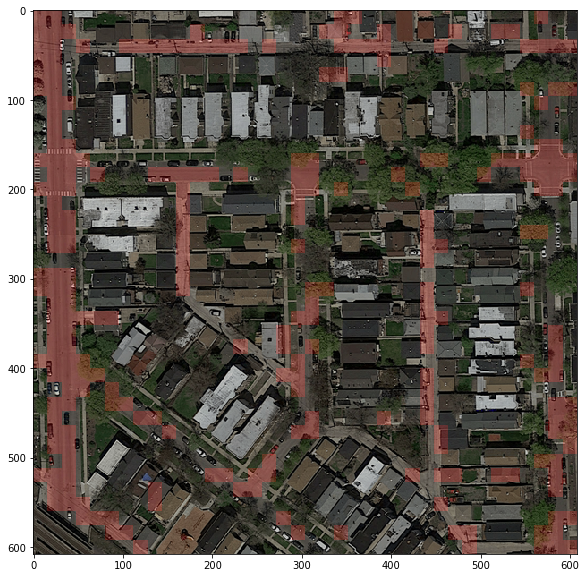

In [71]:
w = imgs_test[img_idx].shape[0]
h = imgs_test[img_idx].shape[1]
predicted_im = label_to_img(w, h, patch_size, patch_size, Zi)
cimg = concatenate_images(imgs_test[img_idx], predicted_im)
fig1 = plt.figure(figsize=(10, 10)) # create a figure with the default size 
plt.imshow(cimg, cmap='Greys_r')

new_img = make_img_overlay(imgs_test[img_idx], predicted_im)

plt.imshow(new_img)



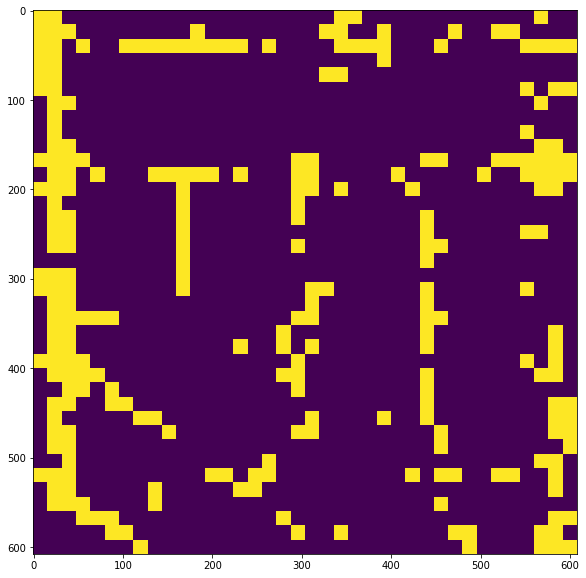

In [72]:
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.imshow(predicted_im)
fig.savefig("logreg_pred.png")